# ST_1: Install and Import Packages/Modules

In [5]:
# put at the very beginning of notebook
#from google.colab import drive
#drive.mount('/content/drive')
#     Optional: move to the desired location (but module below does that job)
#     must use %cd not !cd
#%cd drive/My Drive/DIRECTORY_IN_YOUR_DRIVE
#     DO NOT RUN THIS IF U RUN MODULE

from google.colab import files #allow upload local files
import io #allow u to read csv files into pandas DF in colab
import os #used to set working dir later

import itertools #efficient looping
import copy #extra

import warnings
warnings.filterwarnings('ignore') #time series

import numpy as np
from numpy.random import normal, seed
from scipy.stats import norm
import pandas as pd
import pandas_datareader.data as web

import seaborn as sns #extra
import graphviz #extra
import pydot #extra (needed interface for graphviz)

from pylab import *
import matplotlib.pylab as plt
#plt.style.use('fivethirtyeight') 
#special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline

!pip install chart_studio
from chart_studio import plotly #new -> import plotly FROM chart_studio
from plotly import tools
#import plotly.plotly as py 
#Note that plotly.plotly is deprecated
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

import statsmodels.api as sm #gets almost everything
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

import sklearn

import tensorflow as tf
import tensorflow_hub as hub

In [13]:
#Step 2: MAKE FOLDER IN GOOGLE DRIVE (either in Colab Notebooks/ OR Github/)

#Step 3: choose where you want your project files to be saved
#import os
#/content/drive/MyDrive/Colab Notebooks/Chang_Covid

project_folder = "Colab Notebooks/Chang_Covid/"

#Step 4: set base Google Drive directory (do not change)
root_dir = "/content/drive/MyDrive/"

#Step 5: Write function for creating and setting WORK dir
def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  #if os.path.isdir(root_dir + project_folder) == False:
    #os.mkdir(root_dir + project_folder)
    #print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)

  # create a test file to make sure it shows up in the right place
  #!touch 'new_file_in_working_directory.txt'
  #print('\nYour working directory was changed to ' + root_dir + project_folder + \
        #"\n\nAn empty text file was created there. You can also run !pwd to confirm the current working directory." )

create_and_set_working_directory(project_folder)

In [9]:
!pwd

/content/drive/MyDrive/Colab Notebooks/Chang_Covid


# ST_2: Read in CSV and Prepare for ML

In [10]:
pd.options.display.float_format = '{:,.2f}'.format #only concern 2 digits after the decimal point
pd.set_option('display.width', 75) #safer option than .set_option.display.width bc regex will match to multiple option names
pd.set_option('display.max_columns', 10)

In [11]:
#this file does not have leap year values
#REMINDER: CHECK IF THE PARSE DATES FUNCTION WORKED OR NOT
pt_all2020pts_v0 = pd.read_csv('all_2020_covid_pts_v0.csv',\
                              names=['date_time','visit_id','mrn','age','gender','race','ethnicity',\
                                     'eddispo','acuity_level',\
                                     'dx_cancer','dx_hiv','dx_asthma','dx_copd','dx_cad','dx_diab','dx_liver','dx_chf','dx_ckd','dx_renalflr','dx_htn',\
                                     'zip_code'],\
                              index_col='date_time',\
                              skiprows=1,\
                              parse_dates=['date_time'],
                              low_memory=False)

In [12]:
pt_all2020pts_v0.isnull().sum()

visit_id          0
mrn               0
age               0
gender            0
race              0
ethnicity       157
eddispo           0
acuity_level      0
dx_cancer         0
dx_hiv            0
dx_asthma         0
dx_copd           0
dx_cad            0
dx_diab           0
dx_liver          0
dx_chf            0
dx_ckd            0
dx_renalflr       0
dx_htn            0
zip_code          4
dtype: int64

In [ ]:
pt_all2020_no_null_v1 = pt_all2020pts_v0.dropna()

In [ ]:
pt_all2020_no_null_v1.isnull().sum()

visit_id        0
mrn             0
age             0
gender          0
race            0
ethnicity       0
eddispo         0
acuity_level    0
dx_cancer       0
dx_hiv          0
dx_asthma       0
dx_copd         0
dx_cad          0
dx_diab         0
dx_liver        0
dx_chf          0
dx_ckd          0
dx_renalflr     0
dx_htn          0
zip_code        0
dtype: int64

In [ ]:
pt_all2020_no_null_v1.shape

(181800, 20)

In [ ]:
pt_all2020_no_null_v1.index

DatetimeIndex(['2019-12-10 00:01:00', '2019-12-10 00:03:00',
               '2019-12-10 00:06:00', '2019-12-10 00:07:00',
               '2019-12-10 00:09:00', '2019-12-10 00:11:00',
               '2019-12-10 00:18:00', '2019-12-10 00:20:00',
               '2019-12-10 00:21:00', '2019-12-10 00:26:00',
               ...
               '2020-11-09 19:46:00', '2020-11-09 19:49:00',
               '2020-11-09 19:52:00', '2020-11-09 20:07:00',
               '2020-11-09 21:05:00', '2020-11-09 21:26:00',
               '2020-11-09 21:44:00', '2020-11-09 21:55:00',
               '2020-11-09 22:08:00', '2020-11-09 22:24:00'],
              dtype='datetime64[ns]', name='date_time', length=181800, freq=None)

In [ ]:
pt_all2020_no_null_v1.index.nunique()

158323

In [ ]:
pt_all2020_no_null_v1.sort_index()

,visit_id,mrn,age,gender,race,...,dx_chf,dx_ckd,dx_renalflr,dx_htn,zip_code
date_time,,,,,,,,,,,
2019-12-10 00:01:00,384794397,4815901,40,0,0,...,0,0,0,0,75232
2019-12-10 00:03:00,384794408,4815902,63,0,1,...,1,1,1,1,75235
2019-12-10 00:06:00,384794422,4815903,38,0,0,...,0,0,0,0,75220
2019-12-10 00:07:00,384794427,4815904,66,0,1,...,0,0,0,1,75212
2019-12-10 00:09:00,384794437,4815905,53,0,0,...,0,0,0,1,75043
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-09 21:26:00,393887775,700767,41,0,1,...,0,1,1,0,75181
2020-11-09 21:44:00,393887912,5250679,50,0,0,...,0,0,0,0,75214
2020-11-09 21:55:00,393887992,5250692,28,1,1,...,0,0,0,0,75204


In [ ]:
pt_all2020_no_null_v1.corr()

,visit_id,mrn,age,gender,race,...,dx_liver,dx_chf,dx_ckd,dx_renalflr,dx_htn
visit_id,1.00,0.02,-0.01,-0.01,0.01,...,0.00,-0.01,-0.00,-0.00,-0.01
mrn,0.02,1.00,-0.31,-0.03,-0.09,...,-0.19,-0.20,-0.17,-0.18,-0.30
age,-0.01,-0.31,1.00,-0.07,0.01,...,0.25,0.34,0.31,0.32,0.55
gender,-0.01,-0.03,-0.07,1.00,-0.04,...,-0.00,-0.04,-0.08,-0.06,-0.07
race,0.01,-0.09,0.01,-0.04,1.00,...,-0.05,0.03,0.03,0.02,0.03
eddispo,0.01,0.02,0.00,-0.01,0.01,...,0.03,0.10,0.15,0.13,0.05
acuity_level,-0.00,0.02,-0.09,-0.03,0.03,...,-0.08,-0.14,-0.15,-0.15,-0.10
dx_cancer,0.00,-0.12,0.25,0.04,-0.01,...,0.22,0.18,0.19,0.21,0.19
dx_hiv,0.00,-0.07,0.03,-0.07,0.03,...,0.13,0.07,0.11,0.11,0.07
dx_asthma,-0.01,-0.16,0.03,0.05,0.05,...,0.09,0.14,0.08,0.08,0.13


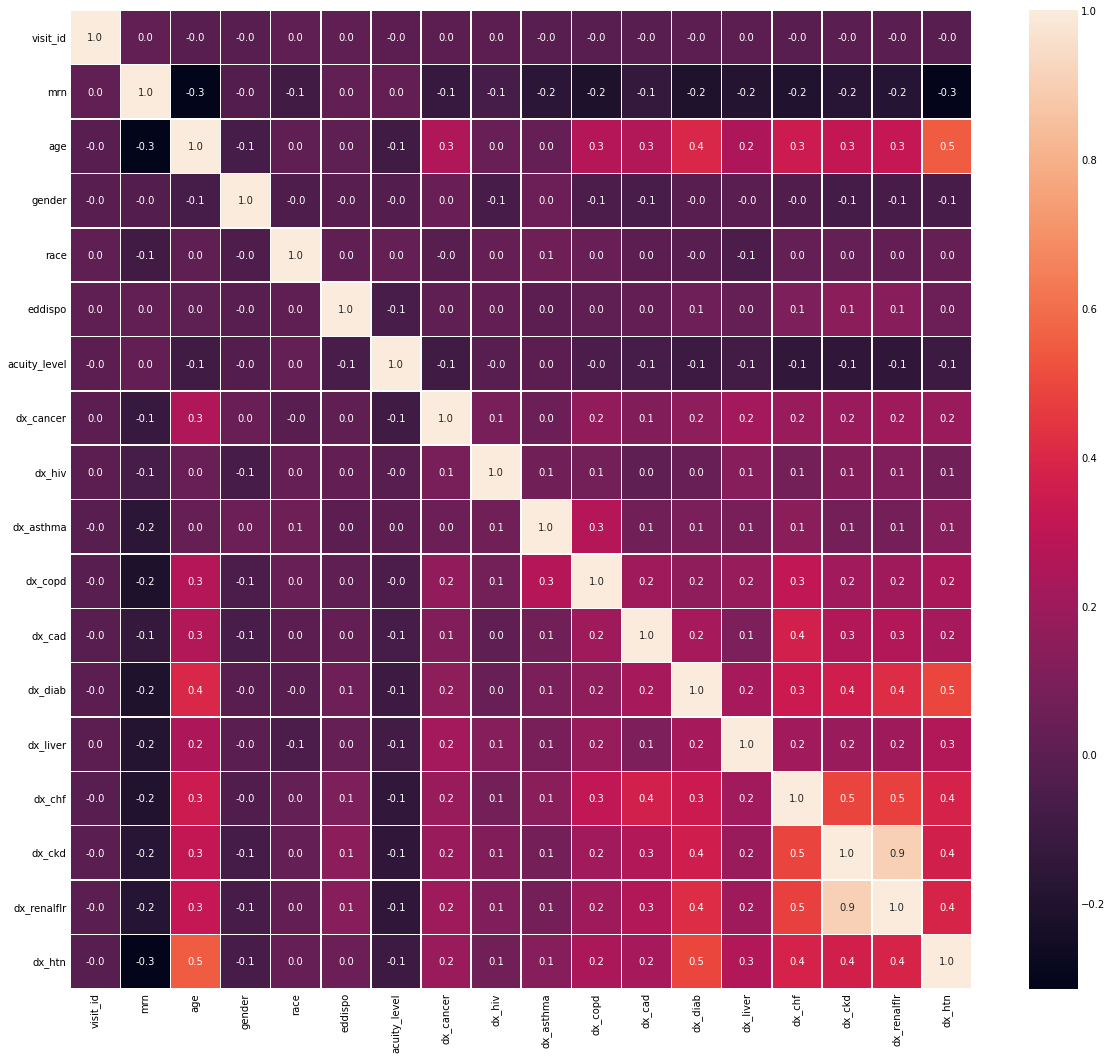

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(pt_all2020_no_null_v1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

# ST_3: Copy DF and Make Categorical Version

In [ ]:
pt_all2020_fill_categorical_v0 = pt_all2020_no_null_v1.copy(deep=True)

In [ ]:
pt_all2020_fill_categorical_v0.dtypes

visit_id         int64
mrn              int64
age              int64
gender           int64
race             int64
ethnicity       object
eddispo          int64
acuity_level     int64
dx_cancer        int64
dx_hiv           int64
dx_asthma        int64
dx_copd          int64
dx_cad           int64
dx_diab          int64
dx_liver         int64
dx_chf           int64
dx_ckd           int64
dx_renalflr      int64
dx_htn           int64
zip_code        object
dtype: object

In [ ]:
#define dictionaries
numerical_var_map = {'gender':{0:'Male', 1:'Female', 2:'Unknown'},\
         'race':{0:'White',1:'Black',2:'Asian',3:'American_Indian',4:'Eastern_Indian',\
                 5:'Hispanic',6:'Other',7:'Other_Pacific_Islander',8:'Unknown'},\
         #'ethnicity':{0:'Non_Hispanic',1:'Hispanic',2:'Unknown'},\
         'eddispo':{1:'Discharge',2:'9OBS_Discharge_To_Home',3:'Admit_To_Parkland',\
                    4:'AMA',5:'Arrived_In_Error',6:'Deceased',7:'Left_Before_Treatment_Completed',\
                    8:'Left_Without_Being_Seen',9:'Social_Needs_Only',10:'Transfer_To_Another_Facility',\
                    11:'Transfer_To_Dialysis',12:'Unknown'}}
print(numerical_var_map)
type(numerical_var_map)

{'gender': {0: 'Male', 1: 'Female', 2: 'Unknown'}, 'race': {0: 'White', 1: 'Black', 2: 'Asian', 3: 'American_Indian', 4: 'Eastern_Indian', 5: 'Hispanic', 6: 'Other', 7: 'Other_Pacific_Islander', 8: 'Unknown'}, 'eddispo': {1: 'Discharge', 2: '9OBS_Discharge_To_Home', 3: 'Admit_To_Parkland', 4: 'AMA', 5: 'Arrived_In_Error', 6: 'Deceased', 7: 'Left_Before_Treatment_Completed', 8: 'Left_Without_Being_Seen', 9: 'Social_Needs_Only', 10: 'Transfer_To_Another_Facility', 11: 'Transfer_To_Dialysis', 12: 'Unknown'}}


dict

In [ ]:
zip_code_dict = {'75041':'5','75042':'5','75051':'5','75060':'5','75061':'5','75141':'5','75172':'5','75180':'5','75203':'5','75210':'5','75211':'5','75212':'5','75215':'5','75216':'5','75217':'5','75220':'5','75223':'5','75224':'5','75227':'5','75228':'5','75231':'5','75232':'5','75233':'5','75236':'5','75237':'5','75240':'5','75241':'5','75246':'5','75247':'5','75253':'5','75006':'4','75040':'4','75050':'4','75062':'4','75116':'4','75134':'4','75146':'4','75149':'4','75150':'4','75159':'4','75208':'4','75226':'4','75235':'4','75243':'4','75038':'3','75043':'3','75044':'3','75052':'3','75115':'3','75137':'3','75234':'3','75238':'3','75249':'3','75251':'3','75254':'3','75080':'2','75081':'2','75104':'2','75181':'2','75204':'2','75206':'2','75207':'2','75229':'2','75001':'1','75019':'1','75039':'1','75048':'1','75063':'1','75088':'1','75089':'1','75182':'1','75201':'1','75202':'1','75205':'1','75209':'1','75214':'1','75218':'1','75219':'1','75225':'1','75230':'1','75244':'1','75248':'1'}
print(zip_code_dict)

{'75041': '5', '75042': '5', '75051': '5', '75060': '5', '75061': '5', '75141': '5', '75172': '5', '75180': '5', '75203': '5', '75210': '5', '75211': '5', '75212': '5', '75215': '5', '75216': '5', '75217': '5', '75220': '5', '75223': '5', '75224': '5', '75227': '5', '75228': '5', '75231': '5', '75232': '5', '75233': '5', '75236': '5', '75237': '5', '75240': '5', '75241': '5', '75246': '5', '75247': '5', '75253': '5', '75006': '4', '75040': '4', '75050': '4', '75062': '4', '75116': '4', '75134': '4', '75146': '4', '75149': '4', '75150': '4', '75159': '4', '75208': '4', '75226': '4', '75235': '4', '75243': '4', '75038': '3', '75043': '3', '75044': '3', '75052': '3', '75115': '3', '75137': '3', '75234': '3', '75238': '3', '75249': '3', '75251': '3', '75254': '3', '75080': '2', '75081': '2', '75104': '2', '75181': '2', '75204': '2', '75206': '2', '75207': '2', '75229': '2', '75001': '1', '75019': '1', '75039': '1', '75048': '1', '75063': '1', '75088': '1', '75089': '1', '75182': '1', '7520

In [ ]:
pt_all2020_fill_categorical_v1 = pt_all2020_fill_categorical_v0.replace(numerical_var_map)
pt_all2020_fill_categorical_v1.head(2)

,visit_id,mrn,age,gender,race,...,dx_chf,dx_ckd,dx_renalflr,dx_htn,zip_code
date_time,,,,,,,,,,,
2019-12-10 00:01:00,384794397,4815901,40,Male,White,...,0,0,0,0,75232
2019-12-10 00:03:00,384794408,4815902,63,Male,Black,...,1,1,1,1,75235


In [ ]:
pt_all2020_fill_categorical_v1['sni'] = pt_all2020_fill_categorical_v1['zip_code'].map(zip_code_dict)
pt_all2020_fill_categorical_v1.head(5)

,visit_id,mrn,age,gender,race,...,dx_ckd,dx_renalflr,dx_htn,zip_code,sni
date_time,,,,,,,,,,,
2019-12-10 00:01:00,384794397,4815901,40,Male,White,...,0,0,0,75232,5
2019-12-10 00:03:00,384794408,4815902,63,Male,Black,...,1,1,1,75235,4
2019-12-10 00:06:00,384794422,4815903,38,Male,White,...,0,0,0,75220,5
2019-12-10 00:07:00,384794427,4815904,66,Male,Black,...,0,0,1,75212,5
2019-12-10 00:09:00,384794437,4815905,53,Male,White,...,0,0,1,75043,3


In [ ]:
pt_all2020_fill_categorical_v1.dtypes

visit_id         int64
mrn              int64
age              int64
gender          object
race            object
ethnicity       object
eddispo         object
acuity_level     int64
dx_cancer        int64
dx_hiv           int64
dx_asthma        int64
dx_copd          int64
dx_cad           int64
dx_diab          int64
dx_liver         int64
dx_chf           int64
dx_ckd           int64
dx_renalflr      int64
dx_htn           int64
zip_code        object
sni             object
dtype: object

In [ ]:
pt_all2020_fill_categorical_v1.isnull().sum()

visit_id            0
mrn                 0
age                 0
gender              0
race                0
ethnicity           0
eddispo             0
acuity_level        0
dx_cancer           0
dx_hiv              0
dx_asthma           0
dx_copd             0
dx_cad              0
dx_diab             0
dx_liver            0
dx_chf              0
dx_ckd              0
dx_renalflr         0
dx_htn              0
zip_code            0
sni             15726
dtype: int64

In [ ]:
pt_all2020_fill_categorical_v2 = pt_all2020_fill_categorical_v1.dropna()
pt_all2020_fill_categorical_v2.shape

(166074, 21)

In [ ]:
pt_all2020_fill_categorical_v1.shape

(181800, 21)

In [ ]:
pt_all2020_fill_categorical_v2.sort_index()

,visit_id,mrn,age,gender,race,...,dx_ckd,dx_renalflr,dx_htn,zip_code,sni
date_time,,,,,,,,,,,
2019-12-10 00:01:00,384794397,4815901,40,Male,White,...,0,0,0,75232,5
2019-12-10 00:03:00,384794408,4815902,63,Male,Black,...,1,1,1,75235,4
2019-12-10 00:06:00,384794422,4815903,38,Male,White,...,0,0,0,75220,5
2019-12-10 00:07:00,384794427,4815904,66,Male,Black,...,0,0,1,75212,5
2019-12-10 00:09:00,384794437,4815905,53,Male,White,...,0,0,1,75043,3
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-09 21:05:00,393887631,4573615,36,Male,Black,...,0,0,1,75227,5
2020-11-09 21:26:00,393887775,700767,41,Male,Black,...,1,1,0,75181,2
2020-11-09 21:44:00,393887912,5250679,50,Male,White,...,0,0,0,75214,1


In [ ]:
pt_all2020_fill_categorical_v2.head(2)

,visit_id,mrn,age,gender,race,...,dx_ckd,dx_renalflr,dx_htn,zip_code,sni
date_time,,,,,,,,,,,
2019-12-10 00:01:00,384794397,4815901,40,Male,White,...,0,0,0,75232,5
2019-12-10 00:03:00,384794408,4815902,63,Male,Black,...,1,1,1,75235,4


In [ ]:
pt_all2020_fill_categorical_v2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 166074 entries, 2019-12-10 00:01:00 to 2020-11-09 22:08:00
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   visit_id      166074 non-null  int64 
 1   mrn           166074 non-null  int64 
 2   age           166074 non-null  int64 
 3   gender        166074 non-null  object
 4   race          166074 non-null  object
 5   ethnicity     166074 non-null  object
 6   eddispo       166074 non-null  object
 7   acuity_level  166074 non-null  int64 
 8   dx_cancer     166074 non-null  int64 
 9   dx_hiv        166074 non-null  int64 
 10  dx_asthma     166074 non-null  int64 
 11  dx_copd       166074 non-null  int64 
 12  dx_cad        166074 non-null  int64 
 13  dx_diab       166074 non-null  int64 
 14  dx_liver      166074 non-null  int64 
 15  dx_chf        166074 non-null  int64 
 16  dx_ckd        166074 non-null  int64 
 17  dx_renalflr   166074 non-null  in

In [ ]:
pt_all2020_fill_categorical_v3 = pt_all2020_fill_categorical_v2.astype({'visit_id':'float64',\
                                          'mrn':'float64',\
                                          'age':'category',\
                                          'gender':'category',\
                                          'race':'category',\
                                          'ethnicity':'category',\
                                          'eddispo':'category',\
                                          'acuity_level':'category',\
                                          'dx_cancer':'bool',\
                                          'dx_hiv':'bool',\
                                          'dx_asthma':'bool',\
                                          'dx_copd':'bool',\
                                          'dx_cad':'bool',\
                                          'dx_diab':'bool',\
                                          'dx_liver':'bool',\
                                          'dx_chf':'bool',\
                                          'dx_ckd':'bool',\
                                          'dx_renalflr':'bool',\
                                          'dx_htn':'bool',\
                                          'zip_code':'category',\
                                          'sni':'category'})
pt_all2020_fill_categorical_v3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 166074 entries, 2019-12-10 00:01:00 to 2020-11-09 22:08:00
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   visit_id      166074 non-null  float64 
 1   mrn           166074 non-null  float64 
 2   age           166074 non-null  category
 3   gender        166074 non-null  category
 4   race          166074 non-null  category
 5   ethnicity     166074 non-null  category
 6   eddispo       166074 non-null  category
 7   acuity_level  166074 non-null  category
 8   dx_cancer     166074 non-null  bool    
 9   dx_hiv        166074 non-null  bool    
 10  dx_asthma     166074 non-null  bool    
 11  dx_copd       166074 non-null  bool    
 12  dx_cad        166074 non-null  bool    
 13  dx_diab       166074 non-null  bool    
 14  dx_liver      166074 non-null  bool    
 15  dx_chf        166074 non-null  bool    
 16  dx_ckd        166074 non-null  bool    


In [ ]:
pt_all2020_fill_categorical_v3.head(2)

,visit_id,mrn,age,gender,race,...,dx_ckd,dx_renalflr,dx_htn,zip_code,sni
date_time,,,,,,,,,,,
2019-12-10 00:01:00,"384,794,397.00","4,815,901.00",40,Male,White,...,False,False,False,75232,5
2019-12-10 00:03:00,"384,794,408.00","4,815,902.00",63,Male,Black,...,True,True,True,75235,4


In [ ]:
catcols = pt_all2020_fill_categorical_v3.select_dtypes(include=["category"]).columns
pt_all2020_fill_categorical_v3[catcols].isnull().sum()

age             0
gender          0
race            0
ethnicity       0
eddispo         0
acuity_level    0
zip_code        0
sni             0
dtype: int64

In [ ]:
boolcols = pt_all2020_fill_categorical_v3.select_dtypes(include=['bool']).columns
pt_all2020_fill_categorical_v3[boolcols].isnull().sum()

dx_cancer      0
dx_hiv         0
dx_asthma      0
dx_copd        0
dx_cad         0
dx_diab        0
dx_liver       0
dx_chf         0
dx_ckd         0
dx_renalflr    0
dx_htn         0
dtype: int64

In [ ]:
floatcols = pt_all2020_fill_categorical_v3.select_dtypes(include=['float64']).columns
pt_all2020_fill_categorical_v3[floatcols].isnull().sum()

visit_id    0
mrn         0
dtype: int64

In [ ]:
from numpy.lib.twodim_base import diag
diagnostics_bool = ['dx_cancer',\
               'dx_hiv',\
               'dx_asthma',\
               'dx_copd',\
               'dx_cad',\
               'dx_diab',\
               'dx_liver',\
               'dx_chf',\
               'dx_ckd',\
               'dx_renalflr',\
               'dx_htn']
pt_identifiers_float64 = ['visit_id','mrn']
pt_information_category = ['age','gender','race','ethnicity','eddispo','acuity_level','zip_code','sni']
pt_all2020_fill_categorical_v3 = pt_all2020_fill_categorical_v3[pt_identifiers_float64 + pt_information_category + diagnostics_bool]
pt_all2020_fill_categorical_v3.dtypes

visit_id         float64
mrn              float64
age             category
gender          category
race            category
ethnicity       category
eddispo         category
acuity_level    category
zip_code        category
sni             category
dx_cancer           bool
dx_hiv              bool
dx_asthma           bool
dx_copd             bool
dx_cad              bool
dx_diab             bool
dx_liver            bool
dx_chf              bool
dx_ckd              bool
dx_renalflr         bool
dx_htn              bool
dtype: object

In [ ]:
pt_all2020_fill_categorical_v3.head(5)

,visit_id,mrn,age,gender,race,...,dx_liver,dx_chf,dx_ckd,dx_renalflr,dx_htn
date_time,,,,,,,,,,,
2019-12-10 00:01:00,"384,794,397.00","4,815,901.00",40,Male,White,...,False,False,False,False,False
2019-12-10 00:03:00,"384,794,408.00","4,815,902.00",63,Male,Black,...,True,True,True,True,True
2019-12-10 00:06:00,"384,794,422.00","4,815,903.00",38,Male,White,...,True,False,False,False,False
2019-12-10 00:07:00,"384,794,427.00","4,815,904.00",66,Male,Black,...,False,False,False,False,True
2019-12-10 00:09:00,"384,794,437.00","4,815,905.00",53,Male,White,...,True,False,False,False,True


In [ ]:
pt_all2020_fill_categorical_v3.to_csv("/content/drive/MyDrive/Coding_projects/Chang-COVID/Cleaned_and_Categorized_Dataframe.csv")

# ST_4: EDA for Categorized DF

In [ ]:
#/content/drive/MyDrive/Coding_projects/Chang-COVID/categorical_vars_freq.txt
freqout = open('/content/drive/MyDrive/Coding_projects/Chang-COVID/categorical_vars_freq.txt', 'w') 
for col in pt_all2020_fill_categorical_v3.select_dtypes(include=["category"]):
  print(col,\
        "----------------------",\
        "frequencies", pt_all2020_fill_categorical_v3[col].value_counts(),\
        "percentages", pt_all2020_fill_categorical_v3[col].value_counts(normalize=True),\
        sep="\n\n", end="\n\n\n", file=freqout)

freqout.close()


# ST_5: Time Series

In [ ]:
pt_timeseries2020_v0 = pt_all2020_fill_categorical_v3.copy(deep=True)

In [ ]:
pt_timeseries2020_v0.index #no freq specified yet (could be day D, year Y, etc.)

DatetimeIndex(['2019-12-10 00:01:00', '2019-12-10 00:03:00',
               '2019-12-10 00:06:00', '2019-12-10 00:07:00',
               '2019-12-10 00:09:00', '2019-12-10 00:11:00',
               '2019-12-10 00:18:00', '2019-12-10 00:20:00',
               '2019-12-10 00:26:00', '2019-12-10 00:31:00',
               ...
               '2020-11-09 19:44:00', '2020-11-09 19:46:00',
               '2020-11-09 19:49:00', '2020-11-09 19:52:00',
               '2020-11-09 20:07:00', '2020-11-09 21:05:00',
               '2020-11-09 21:26:00', '2020-11-09 21:44:00',
               '2020-11-09 21:55:00', '2020-11-09 22:08:00'],
              dtype='datetime64[ns]', name='date_time', length=166074, freq=None)

In [ ]:
pt_timeseries2020_v0.head(5)

,visit_id,mrn,age,gender,race,...,dx_liver,dx_chf,dx_ckd,dx_renalflr,dx_htn
date_time,,,,,,,,,,,
2019-12-10 00:01:00,"384,794,397.00","4,815,901.00",40,Male,White,...,False,False,False,False,False
2019-12-10 00:03:00,"384,794,408.00","4,815,902.00",63,Male,Black,...,True,True,True,True,True
2019-12-10 00:06:00,"384,794,422.00","4,815,903.00",38,Male,White,...,True,False,False,False,False
2019-12-10 00:07:00,"384,794,427.00","4,815,904.00",66,Male,Black,...,False,False,False,False,True
2019-12-10 00:09:00,"384,794,437.00","4,815,905.00",53,Male,White,...,True,False,False,False,True


<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

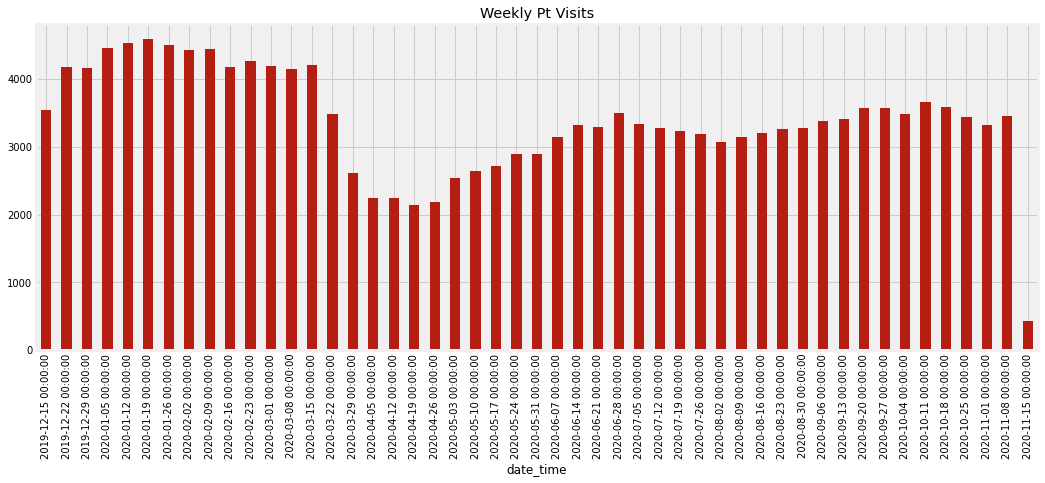

In [ ]:
title = 'Weekly Pt Visits'
pt_timeseries2020_v0['visit_id'].resample(rule='W').count().plot.bar(figsize=(16,6),\
                                                                     title=title,color='#b41f11')

In [ ]:
#from pandas_profiling import ProfileReport


In [ ]:
pt_timeseries2020_group_sni = pt_timeseries2020_v0.groupby('sni').resample('W').count()
pt_timeseries2020_group_sni

visit_id   mrn   age  gender  race  ...  dx_liver  \
sni date_time                                       ...             
1   2019-12-15       284   284   284     284   284  ...       284   
    2019-12-22       366   366   366     366   366  ...       366   
    2019-12-29       344   344   344     344   344  ...       344   
    2020-01-05       372   372   372     372   372  ...       372   
    2020-01-12       394   394   394     394   394  ...       394   
...                  ...   ...   ...     ...   ...  ...       ...   
5   2020-10-18      2073  2073  2073    2073  2073  ...      2073   
    2020-10-25      1856  1856  1856    1856  1856  ...      1856   
    2020-11-01      1840  1840  1840    1840  1840  ...      1840   
    2020-11-08      1869  1869  1869    1869  1869  ...      1869   
    2020-11-15       230   230   230     230   230  ...       230   

                dx_chf  dx_ckd  dx_renalflr  dx_htn  
sni date_time                                        
1   2019-12-15     284     284          284     284  
    2019-12-22     366     366          366     366  
    2019-12-29     344     344          344     344  
    2020-01-05     372     372          372     372  
    2020-01-12     394     394          394     394  
...                ...     ...          ...     ...  
5   2020-10-18    2073    2073         2073    2073  
    2020-10-25    1856    1856         1856    1856  
    2020-11-01    1840    1840         1840    1840  
    2020-11-08    1869    1869         1869    1869  
    2020-11-15     230     230          230     230  

[245 rows x 21 columns]

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/google/colab/data_table.py", line 180, in _repr_mimebundle_
    dataframe = self._preprocess_dataframe()
  File "/usr/local/lib/python3.7/dist-packages/google/colab/data_table.py", line 168, in _preprocess_dataframe
    dataframe = dataframe.reset_index()
  File "/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py", line 5799, in reset_index
    new_obj.insert(0, name, level_values)
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py", line 4414, in insert
    raise ValueError(f"cannot insert {column}, already exists")
ValueError: cannot insert sni, already exists
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/google/colab/data_table.py", line 192, in _repr_javascript_module_
    return self._gen_js(self._preprocess_dat

AttributeError: ignored

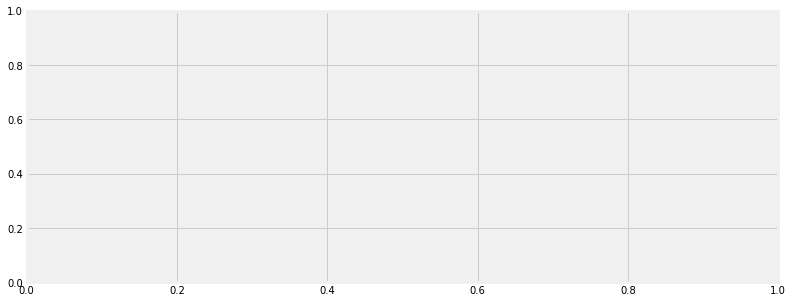

In [ ]:
#pt_timeseries2020_group_sni.plot(subplot=True,figsize=(12,5))

In [ ]:
#pt_timeseries2020_group_zc.loc['75235'].shape

(49, 21)

In [ ]:
#pt_timeseries2020_group_zc.loc['75216'].shape

(49, 21)

In [ ]:
dfv0 = pt_timeseries2020_v0
hourly_pt_in_dept = dfv0[['visit_id']].resample(rule='H').count()

In [ ]:
hourly_pt_in_dept.head(3)

,visit_id
date_time,
2019-12-10 00:00:00,15
2019-12-10 01:00:00,11
2019-12-10 02:00:00,15


In [ ]:
hourly_pt_in_dept.shape

(8063, 1)

matplotlib.axes._subplots.AxesSubplot

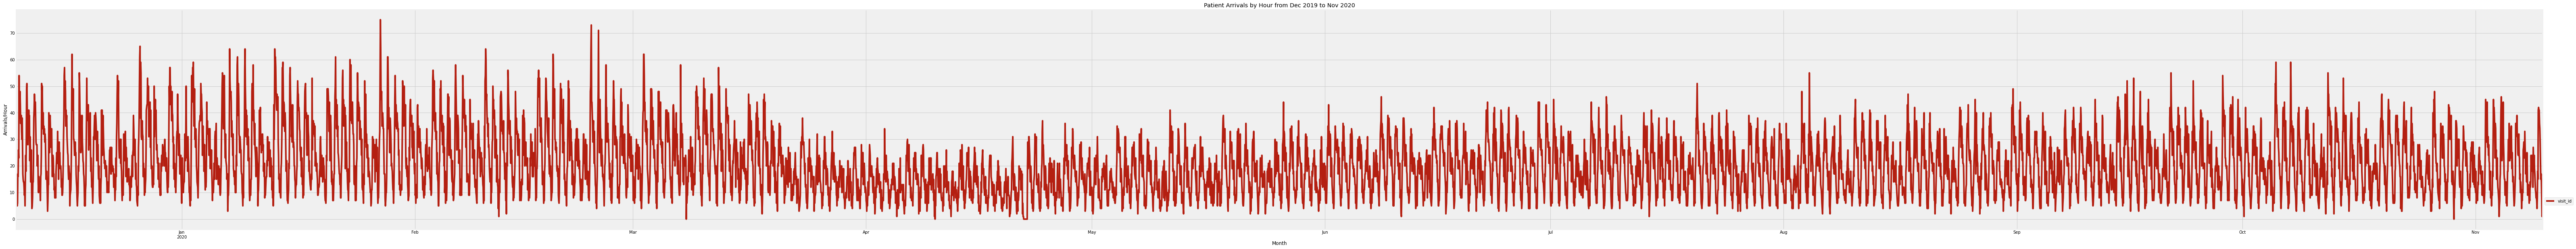

In [ ]:
title ='Patient Arrivals by Hour from Dec 2019 to Nov 2020'
ylabel = 'Arrivals/Hour'
xlabel = 'Month'
ax = hourly_pt_in_dept.plot(figsize=(100,10),color='#b41f11',title=title)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.autoscale(axis='x',tight=True)
ax.legend(loc=3, bbox_to_anchor=(1.0,0.1));

type(ax)

In [ ]:
hourly_pt_in_dept.to_csv('/content/drive/MyDrive/Coding_projects/Chang-COVID/hourly_pd.csv')

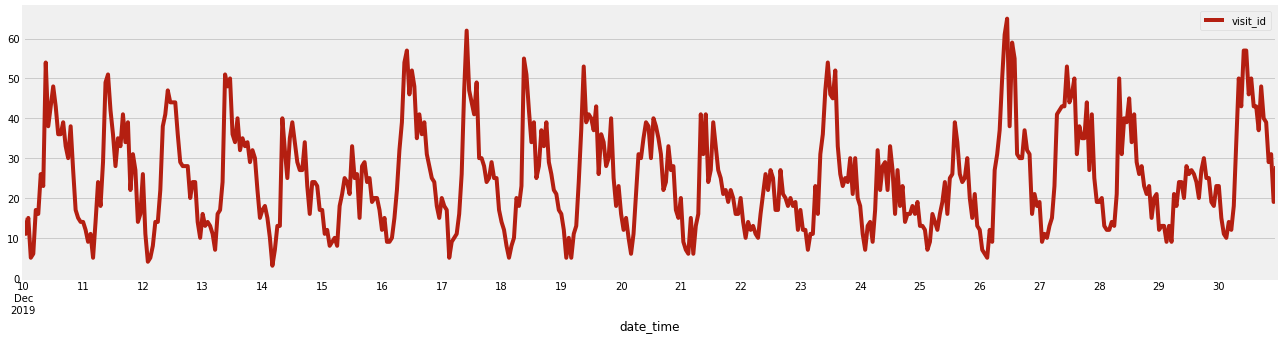

In [ ]:
hourly_pt_in_dept['2019-12-10':'2019-12-30'].plot(figsize=(20,5),color='#b41f11')

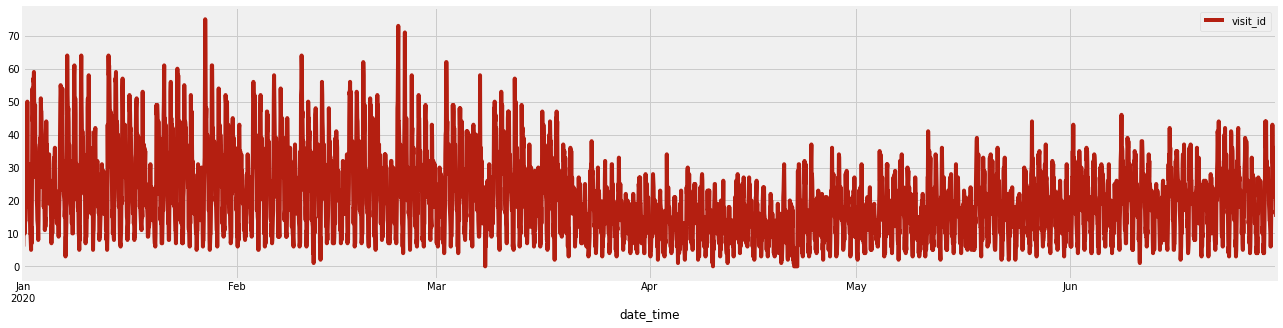

In [ ]:
hourly_pt_in_dept['2020-01-01':'2020-06-30'].plot(legend=True,figsize=(20,5),color='#b41f11')

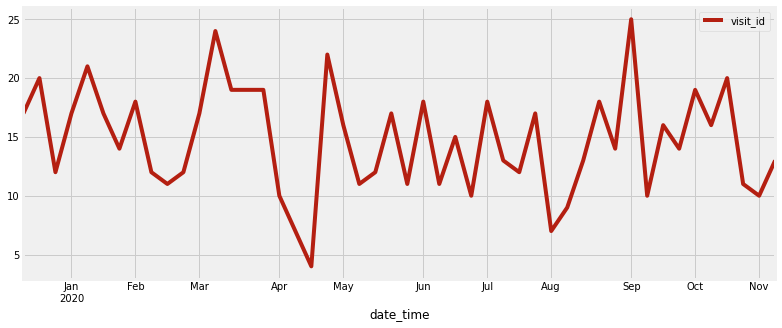

In [ ]:
hourly_pt_in_dept['visit_id'].asfreq('W').plot(legend=True, figsize=(12,5),color='#b41f11')

In [ ]:
#weekly_pt_in_dept = dfv0[['visit_id']].resample(rule='W').count()

In [ ]:
#weekly_pt_in_dept.plot(figsize=(12,5))

In [ ]:
#monthly_pt_in_dept = dfv0[['visit_id']].resample(rule='M').count()

In [ ]:
#monthly_pt_in_dept.plot(figsize=(12,5))

In [ ]:
minutely_pt_in_dept = dfv0[['visit_id']].resample(rule='T').count()

In [ ]:
minutely_pt_in_dept.shape

(483728, 1)

In [ ]:
minutely_pt_in_dept['visit_id'].asfreq('H').shape

(8063,)

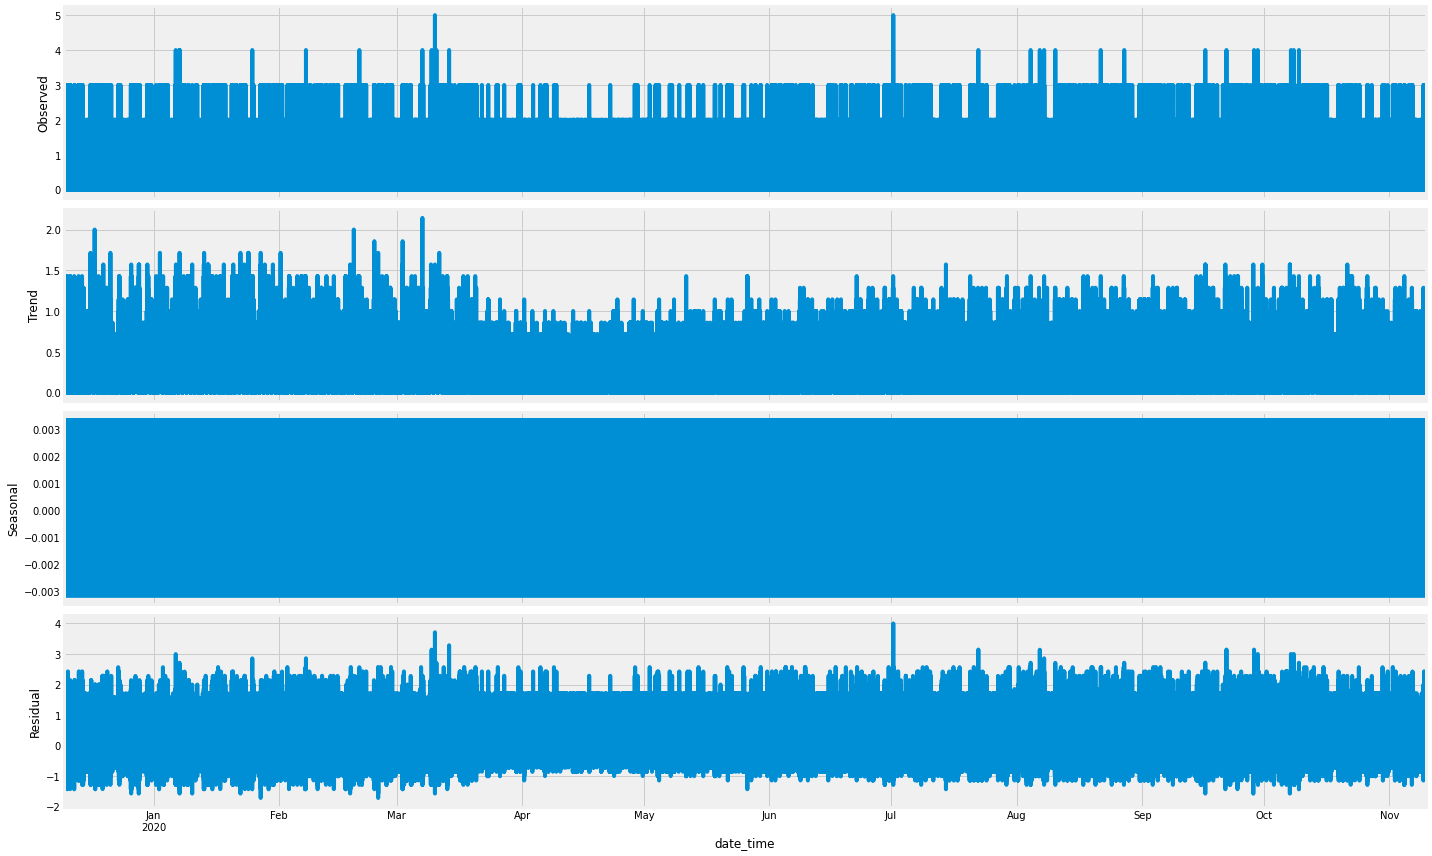

In [ ]:
rcParams['figure.figsize'] = 20, 12
decomposed_pt_volume = sm.tsa.seasonal_decompose(minutely_pt_in_dept["visit_id"],freq=7) # The frequncy is annual if f=360
figure = decomposed_pt_volume.plot()
plt.show()